In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221214_ann_wed.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-15 01:00:00,#乃木坂46ANN,1294314730786443264,shiorioshi46_O
1,2022-12-15 01:00:00,#乃木坂46ANN,1247858636732239872,mayumayukki
2,2022-12-15 01:00:00,#乃木坂46ANN,1527281573216673792,JACK__73_
3,2022-12-15 01:00:00,#乃木坂46ANN,719467647616692224,ryohei100116
4,2022-12-15 01:00:00,#乃木坂46ANN,945576271626485760,asuthiiii_yo
...,...,...,...,...
13960,2022-12-15 03:03:55,おごりのカッコいい払い方って難しいけど、だからこそかっこいいのかな？ ちゃんとスポーツ観戦し...,1523654611193589761,EandSEandRA
13961,2022-12-15 03:03:56,お疲れ様でした #乃木坂46ANN,1539669573628088321,nara_nogi_yama
13962,2022-12-15 03:04:11,しおりさん、スタッフさんオツカレサマデシタ！！ 久々の1人喋りスポーツの話満載でしたが色んな...,1254132307423752192,SABOnogi_46
13963,2022-12-15 03:04:13,12/14㈬#あちこちオードリー #乃木坂46ANN #SPYのボスの正体は佐久間宣行 #f...,1007964998327386114,Virtlaud1cres


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-15 01:00:00,668
1,2022-12-15 01:01:00,204
2,2022-12-15 01:02:00,171
3,2022-12-15 01:03:00,160
4,2022-12-15 01:04:00,157
...,...,...
120,2022-12-15 03:00:00,160
121,2022-12-15 03:01:00,78
122,2022-12-15 03:02:00,31
123,2022-12-15 03:03:00,9


In [4]:
filename =  "count_221214_ann_wed.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(668, 3)

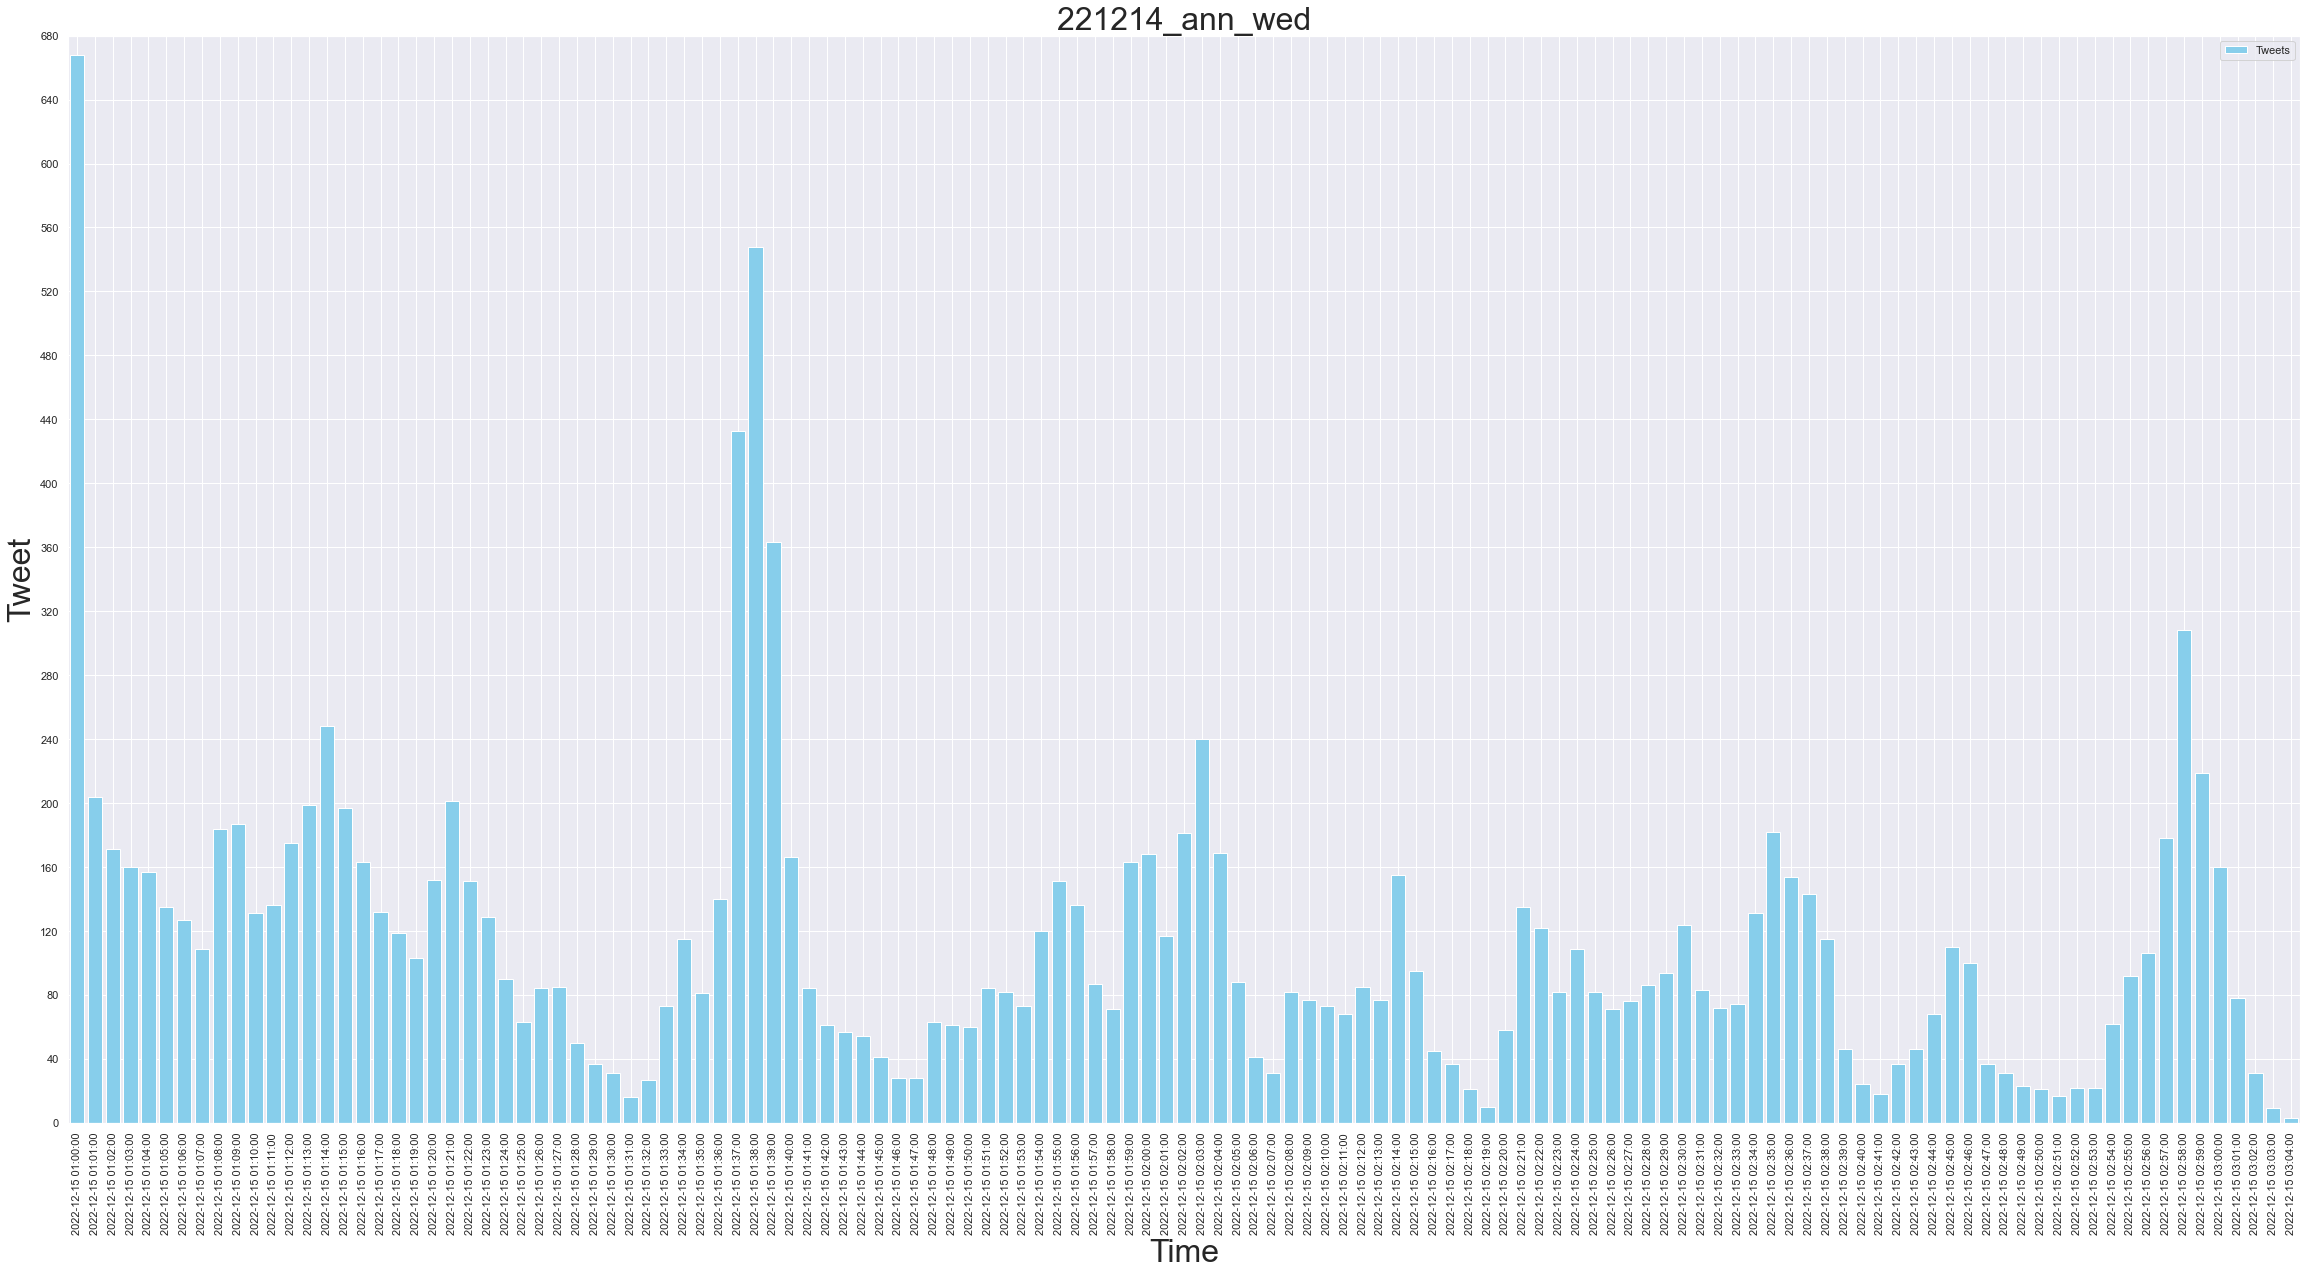

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221214_ann_wed", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 680) # y軸の範囲を指定する
start = 0
end = 681
stepsize = 40
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")